# pynq 2.7 sobel webcamer 演示
## 注意，使用embedded_device.py 

In [ ]:
import os
from pynq import Overlay
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pynq import allocate

In [2]:
ol = Overlay("./overlay/krnl_sobel.xclbin")

In [3]:
krnl_sobel = ol.sobel_accel_1

In [4]:
krnl_sobel.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, AUTO_RESTART=0, AP_CONTINUE=0),
  img_inp = Register(value=0),
  img_out1 = Register(value=0),
  img_out2 = Register(value=0),
  rows = Register(value=0),
  cols = Register(value=0)
}

In [5]:
# image_bgr = cv2.imread('./image/128x128.png')
# image_in  = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)   # 转换为gray
# import matplotlib.pyplot as plt
# plt.imshow(image_in,cmap='gray')

In [6]:
videoIn = cv2.VideoCapture(0)
ret, image_in = videoIn.read()

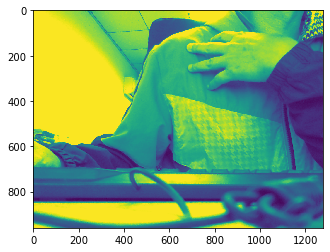

In [7]:
plt.imshow(cv2.cvtColor(image_in,cv2.COLOR_BGR2GRAY))

In [8]:
image_in  = cv2.cvtColor(image_in,cv2.COLOR_BGR2GRAY)   # 转换为gray

In [9]:
image_in.shape

(960, 1280)

In [10]:
kern_image_in  = allocate(shape=(1*image_in.shape[0] *image_in.shape[1]), dtype=np.uint8)
kern_image_out1 = allocate(shape=(1*image_in.shape[0] *image_in.shape[1]), dtype=np.uint8)
kern_image_out2 = allocate(shape=(1*image_in.shape[0] *image_in.shape[1]), dtype=np.uint8)

In [11]:
kern_image_in[:] = image_in.reshape(1*image_in.shape[0] * image_in.shape[1])

In [12]:
kern_image_in

PynqBuffer([255, 255, 255, ..., 143, 143, 142], dtype=uint8)

# Run the kernel

In [13]:
%%timeit
kern_image_in.sync_to_device()    #kern_image_in.flush()
krnl_sobel.call(kern_image_in, kern_image_out1, kern_image_out2, image_in.shape[0], image_in.shape[1])
kern_image_out1.sync_from_device()     #kern_image_out.invalidate()
kern_image_out2.sync_from_device()     #kern_image_out.invalidate()

7.69 ms ± 382 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
image_out1 = (np.array(kern_image_out1)).reshape(image_in.shape[0],image_in.shape[1])

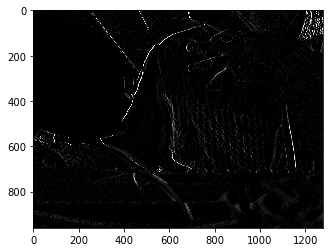

In [15]:
plt.imshow(image_out1, cmap='gray')

In [16]:
%xdel kern_image_in
%xdel kern_image_out
ol.free

NameError: name 'kern_image_out' is not defined


<bound method Overlay.free of <pynq.overlay.Overlay object at 0xaf334760>>